#### Aluno: Carlos Eduardo Fontaneli RA 769949

### Bibliotecas

Para a elaboração do `padding` foi necessário importar a biblioteca `numpy` para manipulação de vetores de valores relativos as imagens e, a biblioteca `matplotlib.pyplot` para impressão das imagens.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementação dos paddings

Para implementar os `paddings` precisa-se dividir sua região em 8 grandes áreas onde cada uma tem seu tratamento próprio, sendo preenchida conforme suas necessidades.

In [2]:
def closest_padding(img, n):
  num_rows, num_cols = img.shape
  new_array = np.zeros((num_rows+2*n, num_cols+2*n))
  
  for row in range(num_rows + 2 * n):
    for col in range(num_cols+ 2 * n):
      # Região superior esquerda do padding
      if row <= n and col <= n:
        new_array[row][col] = img[0][0]
      
      # Região mediana superior do padding
      elif row < n and (col > n and col < n + num_cols):
        new_array[row][col] = img[0][col-n]

      # Região superior direita do padding
      elif row <= n and col >= num_cols + n - 1:
        new_array[row][col] = img[0][-1]
      
      # Região mediana esquerda do padding
      elif (row > n and row < num_rows + n - 1) and col < n:
        new_array[row][col] = img[row - n][0]
      
      # Região mediana direita do padding
      elif (row > n and row < num_rows + n - 1) and col > num_cols + n - 1:
        new_array[row][col] = img[row - n][-1]
        
      # Região inferior esquerda do padding
      elif row >= num_rows + n - 1 and col <= n :
        new_array[row][col] = img[-1][0]
        
      # Região mediana inferior do padding
      elif row > n + num_rows - 1 and (col > n and col < n + num_cols):
        new_array[row][col] = img[-1][col-n]
        
      # Região inferior direita do padding
      elif row >= num_rows + n - 1 and col >= num_cols + n - 1:
        new_array[row][col] = img[-1][-1]
        
  # Copiando a imagem    
  for row in range(num_rows):
    for col in range(num_cols):
      new_array[row+n][col+n] = img[row][col]
      
  return new_array

In [3]:
def reflection_padding(img, n):
  num_rows, num_cols = img.shape
  new_array = np.zeros((num_rows+2*n, num_cols+2*n))
  
  for row in range(num_rows + 2 * n):
    for col in range(num_cols+ 2 * n):
      # Região superior esquerda do padding
      if row <= n and col <= n:
        new_array[row][col] = img[n-row][n-col]
      
      # Região mediana superior do padding
      elif row < n and (col > n and col < n + num_cols):
        new_array[row][col] = img[n-row][col - n]
      
      # Região superior direita do padding
      elif row <= n and col >= num_cols + n - 1:
        new_array[row][col] = img[n - row][-((col - (num_cols + n - 2)))]

      # Região mediana esquerda do padding
      elif (row > n and row < num_rows + n - 1) and col < n:
        new_array[row][col] = img[row - n][n-col]
      
      # Região mediana direita do padding
      elif (row > n and row < num_rows + n - 1) and col > num_cols + n - 1:
        new_array[row][col] = img[row - n][-((col - (num_cols + n - 2)))]
        
      # Região inferior esquerda do padding
      elif row >= num_rows + n - 1 and col <= n :
        new_array[row][col] = img[-(row - (num_rows + n - 2))][n-col]
        
      # Região mediana inferior do padding
      elif row > n + num_rows - 1 and (col > n and col < n + num_cols):
        new_array[row][col] = img[-(row - (num_rows + n - 2))][col - n] 
        
      # Região inferior direita do padding
      elif row >= num_rows + n - 1 and col >= num_cols + n - 1:
        new_array[row][col] = img[-(row - (num_rows + n - 2))][-((col - (num_cols + n - 2)))]

  # Copiando a imagem
  for row in range(num_rows):
    for col in range(num_cols):
      new_array[row+n][col+n] = img[row][col]
      
  return new_array

In [4]:
# Para imagens com vários canais de cores aplica-se o padding em cada canal
def n_dim_padding(img, n, padding_type):
  num_rows, num_cols, num_dims = img.shape
  new_array = np.zeros((num_rows+2*n, num_cols+2*n, num_dims))
  
  # Tratando o caso em que a imagem tenha um canal de transparência, assim evita-se 
  # aplicar o padding nesse canal
  if num_dims > 3: 
    for i in range(3, num_dims):
      new_array[:, :, i] = img[:, :, i]
      num_dims -= 1
  if padding_type == 'reflect':
    for i in range(num_dims):
      new_array[:, :, i] = reflection_padding(img[:, :, i], n)
  else:
    for i in range(num_dims):
      new_array[:, :, i] = closest_padding(img[:, :, i], n)
      
  return new_array.astype('uint8')   

In [5]:
# Lendo as imagens que serão usadas
img1 = plt.imread('Imgs/moon.jpg')
img2 = plt.imread('Imgs/colorful_cubes.jpg')

# Tamanho do padding
n = 40

### Aplicando paddings nas imagens

Como a primeira imagem possui apenas um canal de cor basta aplicar o `padding` nesse canal. Por outro lado, para a segunda imagem é necessário aplicar o padding em cada canal de cor.

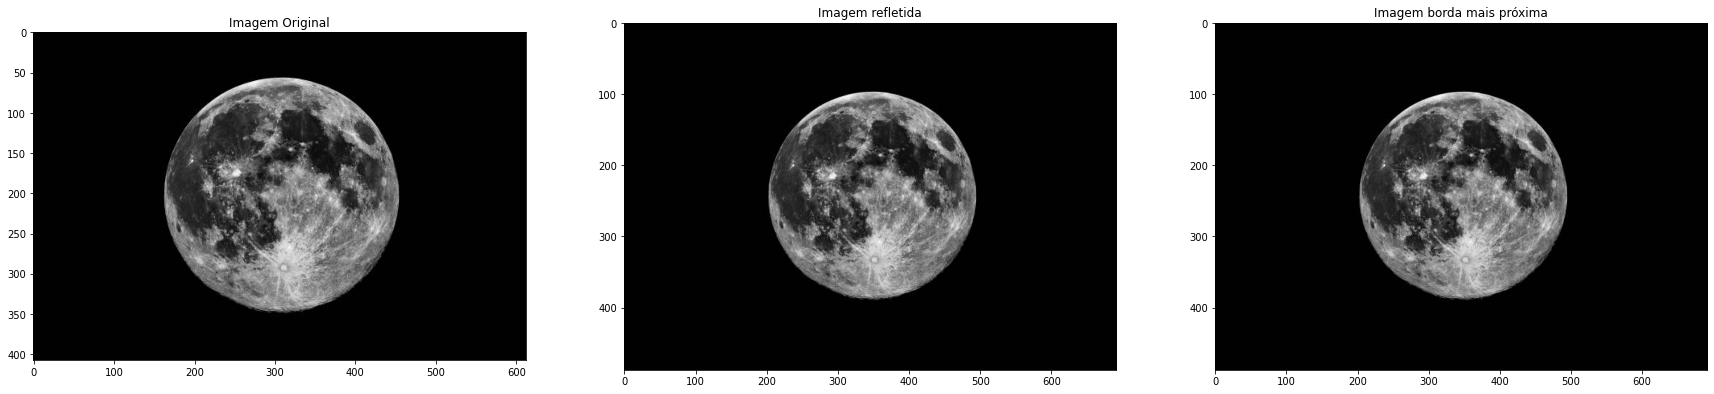

In [6]:
# Paddings da imagem 1
img1_reflected = reflection_padding(img1, n)
img1_closest_edge = closest_padding(img1, n)

plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img1, 'gray')
plt.title("Imagem Original")
plt.subplot(1, 3,  2)
plt.imshow(img1_reflected, 'gray')
plt.title("Imagem refletida")
plt.subplot(1, 3,  3)
plt.imshow(img1_closest_edge, 'gray')
_ = plt.title("Imagem borda mais próxima")

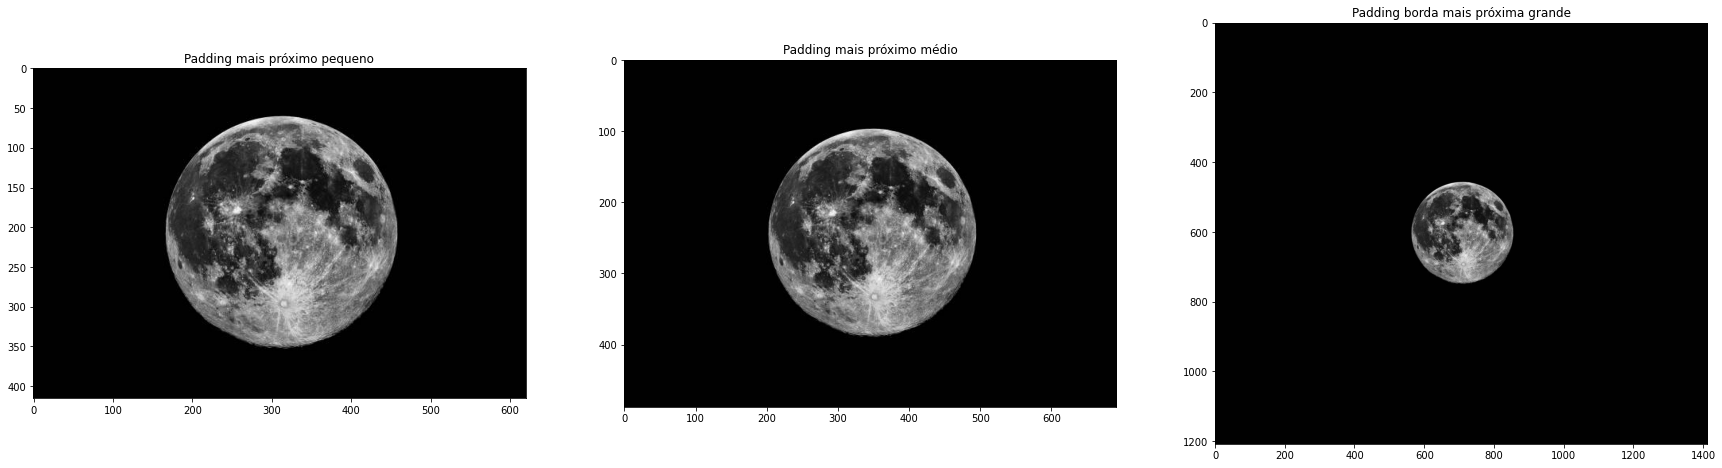

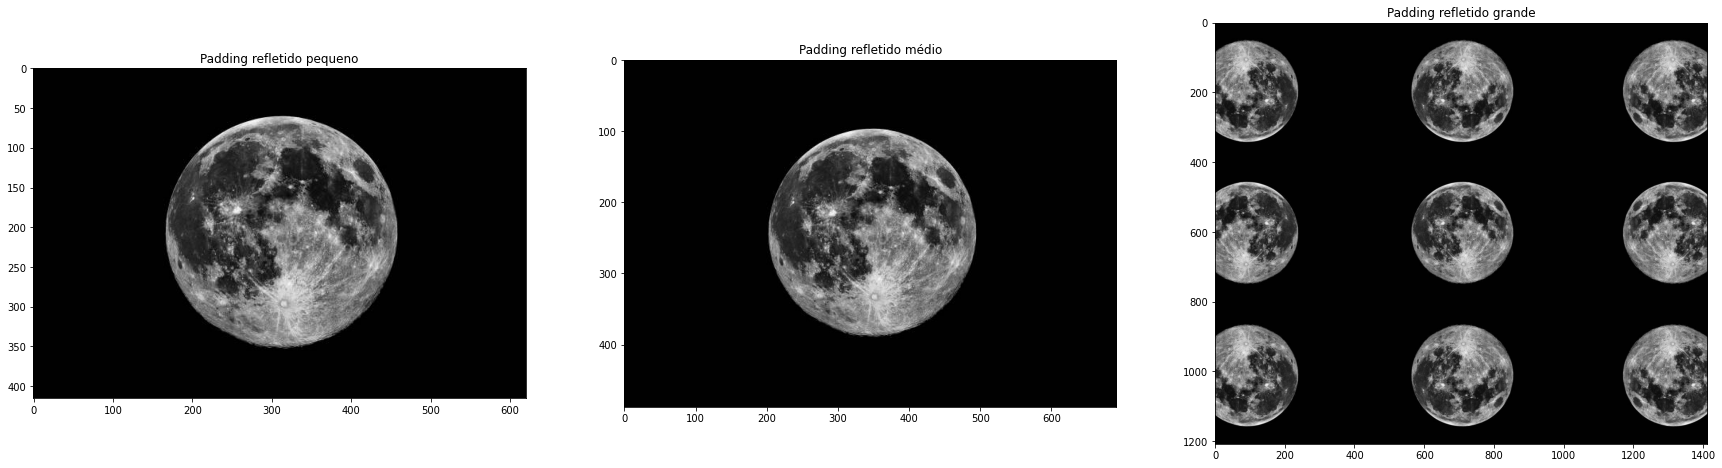

In [7]:
# Diferentes tamanhos de padding
img1_reflected_small = reflection_padding(img1, int(n/10))
img1_closest_edge_small = closest_padding(img1, int(n/10))
img1_reflected_large = reflection_padding(img1, 10 * n)
img1_closest_edge_large = closest_padding(img1, 10 * n)

plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img1_closest_edge_small, 'gray')
plt.title("Padding mais próximo pequeno")
plt.subplot(1, 3,  2)
plt.imshow(img1_closest_edge, 'gray')
plt.title("Padding mais próximo médio")
plt.subplot(1, 3,  3)
plt.imshow(img1_closest_edge_large, 'gray')
plt.title("Padding borda mais próxima grande")

plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img1_reflected_small, 'gray')
plt.title("Padding refletido pequeno")
plt.subplot(1, 3,  2)
plt.imshow(img1_reflected, 'gray')
plt.title("Padding refletido médio")
plt.subplot(1, 3,  3)
plt.imshow(img1_reflected_large, 'gray')
_ = plt.title("Padding refletido grande")

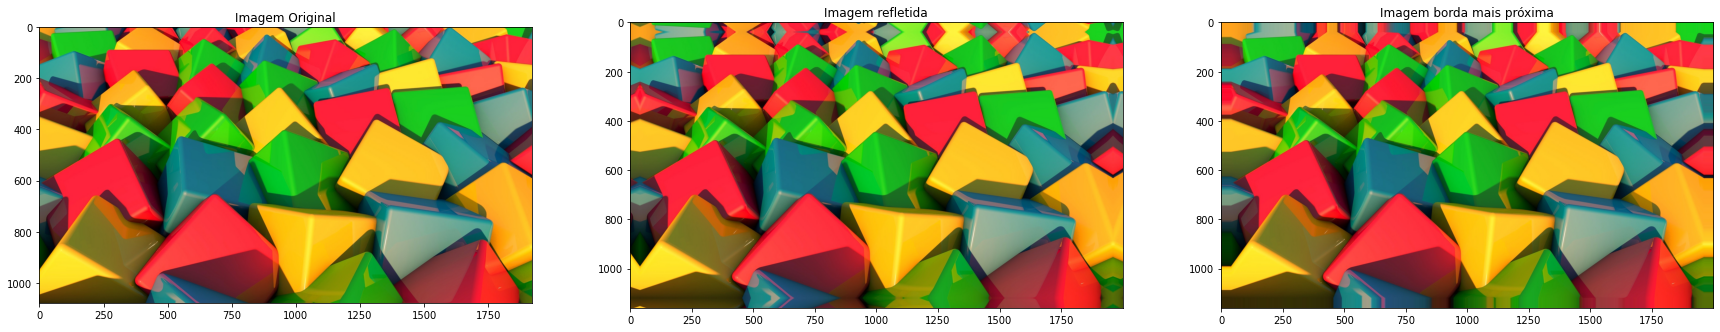

In [8]:
# Padding da imagem 2
img2_reflected = n_dim_padding(img2, n, 'reflect')
img2_closest_edge = n_dim_padding(img2, n, 'edge')


plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img2)
plt.title("Imagem Original")
plt.subplot(1, 3,  2)
plt.imshow(img2_reflected)
plt.title("Imagem refletida")
plt.subplot(1, 3,  3)
plt.imshow(img2_closest_edge)
_ = plt.title("Imagem borda mais próxima")

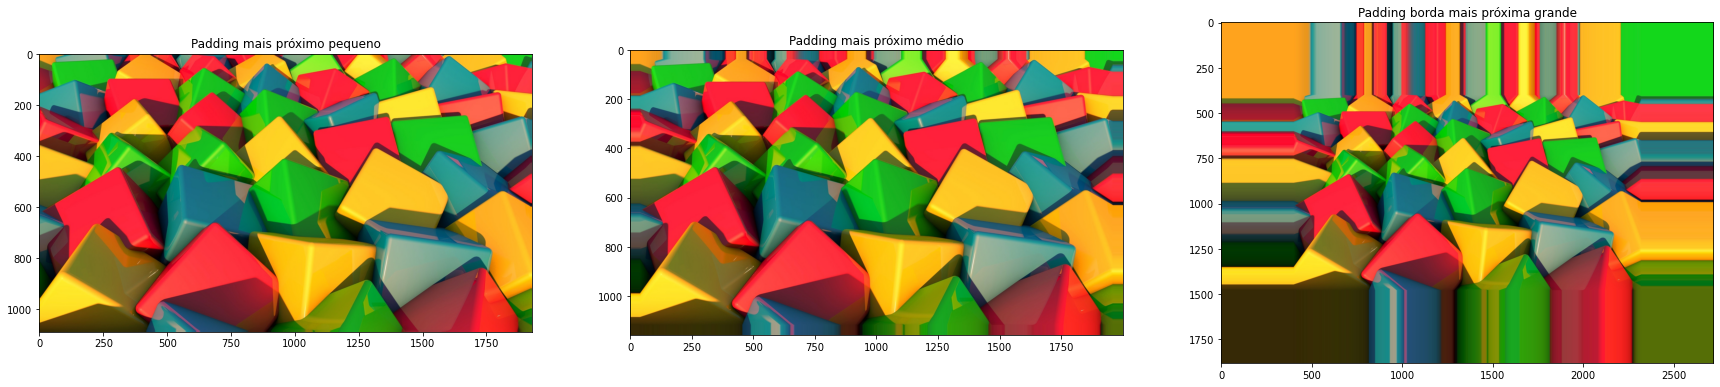

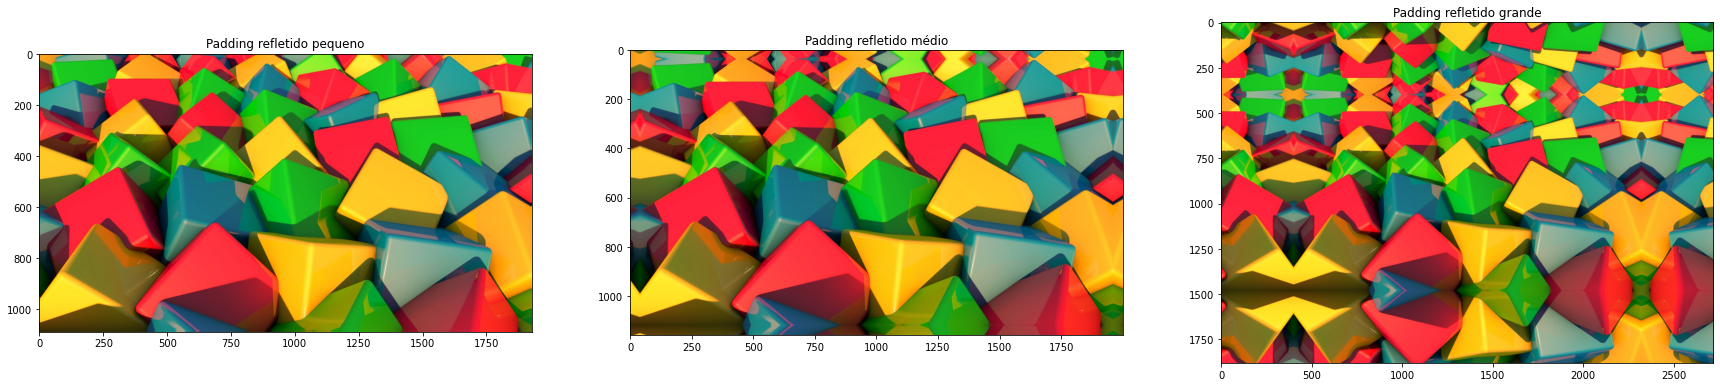

In [9]:
# Diferentes tamanhos de padding
img2_reflected_small = n_dim_padding(img2, int(n/10), 'reflect')
img2_closest_edge_small = n_dim_padding(img2, int(n/10), 'closest')
img2_reflected_large = n_dim_padding(img2, 10 * n, 'reflect')
img2_closest_edge_large = n_dim_padding(img2, 10 * n, 'closest')

plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img2_closest_edge_small)
plt.title("Padding mais próximo pequeno")
plt.subplot(1, 3,  2)
plt.imshow(img2_closest_edge)
plt.title("Padding mais próximo médio")
plt.subplot(1, 3,  3)
plt.imshow(img2_closest_edge_large)
plt.title("Padding borda mais próxima grande")

plt.figure(figsize= [30, 30])
plt.subplot(1, 3,  1)
plt.imshow(img2_reflected_small)
plt.title("Padding refletido pequeno")
plt.subplot(1, 3,  2)
plt.imshow(img2_reflected)
plt.title("Padding refletido médio")
plt.subplot(1, 3,  3)
plt.imshow(img2_reflected_large)
_ = plt.title("Padding refletido grande")